Тестовое задание выполнила Чепурова Алла

chepurova@bk.ru, Telegram - @Screemix

# Задание 2: Калибровка газоанализатора




In [4]:
!pip3 install opensignalsreader

In [10]:
############ Импорт необходимых библиотек ############
import pandas as pd
from opensignalsreader import OpenSignalsReader
import numpy as np
import matplotlib.pyplot as plt

**Задание 1**

*Визуализируйте показатели частоты дыхания, полученные с обоих девайсов.
Что нужно сделать для калибровки обоих сигналов по времени?*

In [19]:
############ Считывание сигналов с первого девайса в pandas dataframe и предобработка таблицы ############
device1 = pd.read_fwf('respiration_data.txt', header=None).iloc[2: , lambda x: [0, 2]].rename(columns={0: "Time", 2: "RR"})
device1['Time'] = device1['Time'].apply(lambda x: int(x[2:4])*60+int(x[5:7]))

In [20]:
############ Считывание сигналов с первого девайса в numpy array ############
device1["RR"] = pd.to_numeric(device1["RR"], downcast="float")
d1 = device1["RR"].to_numpy()
time1 = device1["Time"].to_numpy()

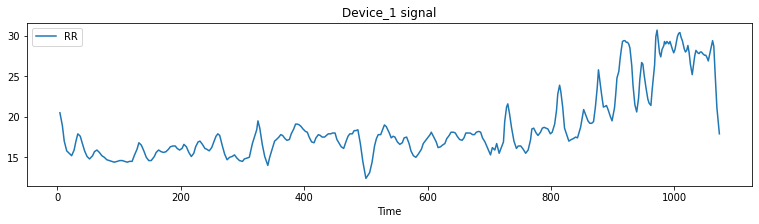

In [22]:
############ Построение графика сигнала во врмемени ############
device1.plot(x='Time', y='RR', figsize=(13,3), title='Device_1 signal', label="RR")

In [24]:
device2 = OpenSignalsReader('bitalino_data.txt')

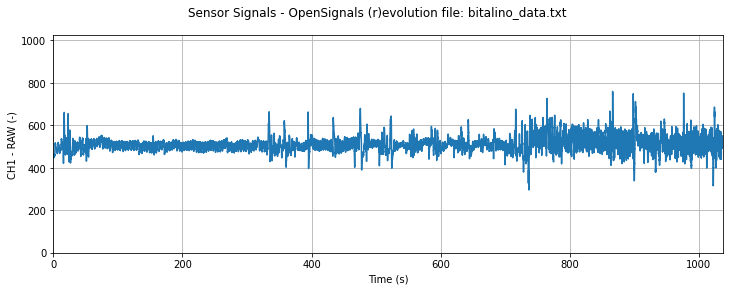

In [29]:
device2.plot(1)

Для временной калибровки второго сигнала по певрому, я отмасштабировала второй сигнал по первому, вычислив коэффициент, равный отношению конечной точки во времени на певром сигнале к максимальной временной точке на втором сигнале. Таким образом, я умножала временные точки второго сигнала на этот коэффициент и получала два сопоставленных графика относительно одной и той же абсолютной шкалы, выраженной в секундах.

In [31]:
d2 = device2.raw(1)
max_t = time1[-1]
coef = max_t/len(d2)
time2 = np.arange(0, len(d2))*coef

График строился с логарифмической шкалой y, для удобства сравнения первого и второго сигнала во времени.

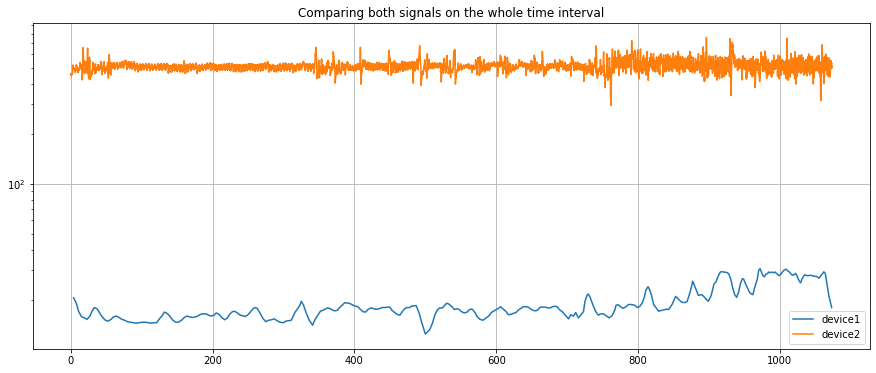

In [35]:
plt.figure(figsize=(15, 6))
plt.plot(time1, d1, label='device1')
plt.plot(time2, d2, label='device2')
plt.yscale("log")
plt.title('Comparing both signals on the whole time interval')
plt.legend()
plt.grid()
plt.show()

**Задание 3.**

Разделение массивов на три равные части, соответствующие разным активностям.

In [37]:
d1_1, d1_2, d1_3 = np.array_split(d1, 3)
t1_1, t1_2, t1_3 = np.array_split(time1, 3)

d2_1, d2_2, d2_3 = np.array_split(d2, 3)

**Небольшая ремарка** - в силу своего опыта я мало работала с сигналами (сейчас взяла курс digital signal processing и надеюсь получить необходимые знания и опыт для работы в вашей лаборатории).

Все поставленные мною гипотезы - взяты из личного эмпирического опыта и анализа графиков.

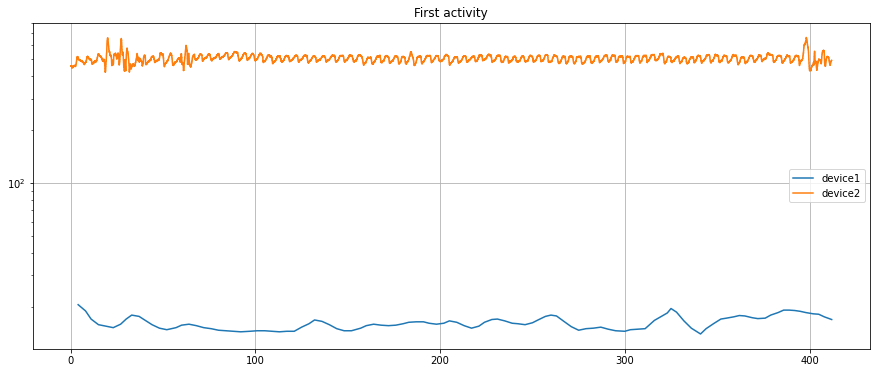

In [40]:
max_t_1 = t1_1[-1]
coef_1 = max_t_1/len(d2_1)
t2_1 = np.arange(0, len(d2_1))*coef_1

plt.figure(figsize=(15, 6))
plt.plot(t1_1, d1_1, label='device1')
plt.plot(t2_1, d2_1, label='device2')
plt.title('First activity')
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

 Во время первой активности можно увидеть низкий средний показатель частоты дыхания на первом девайсе (Bitalino). И из природы мышечного сигнала (электрический сигнал) и анализа графика, можно предположить, что низкой частоте дыхания соответствует низкая амплитуда сигнала с мышц.

 Скорее всего, это пассивная активность (человек сидит, стоит).


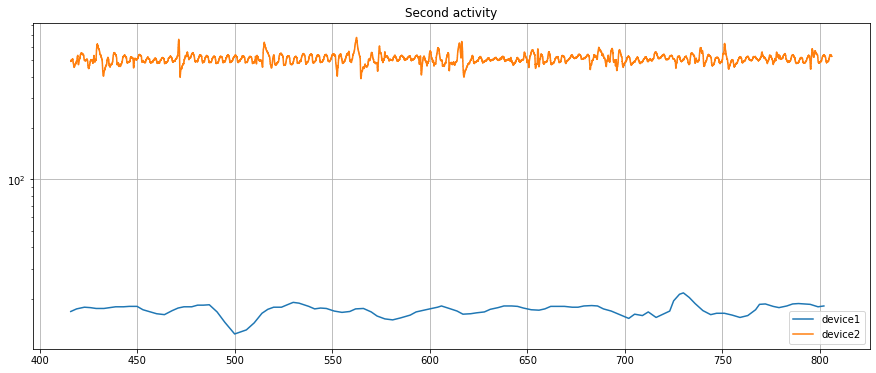

In [44]:
max_t_2 = t1_2[-1]
coef_2 = (max_t_2-max_t_1)/len(d2_2)
t2_2 = np.arange(0, len(d2_2))*coef_2 + np.min(t1_2)

plt.figure(figsize=(15, 6))
plt.plot(t1_2, d1_2, label='device1')
plt.plot(t2_2, d2_2, label='device2')
plt.title('Second activity')
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

График второй активности подтверждает гипотезу - здесь более высокий средний показатель RR при высокой амплитуде графика EMG.

Это похоже на спокойную физическую активность, например, ходьбу.

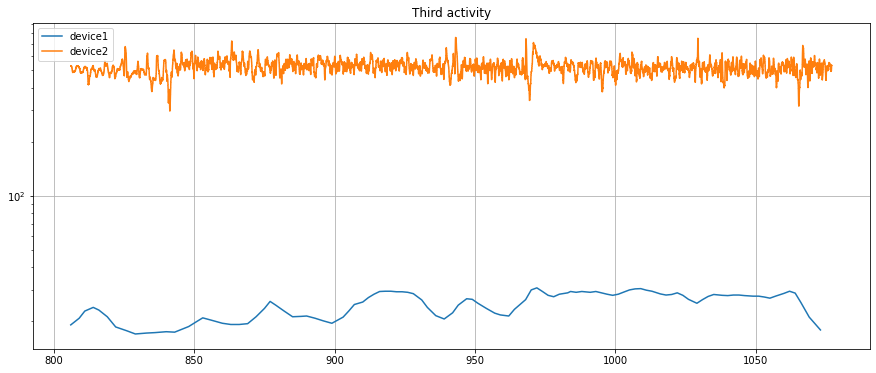

In [43]:
max_t_3 = t1_3[-1]
coef_3 = (max_t_3-max_t_2)/len(d2_3)
t2_3 = np.arange(0, len(d2_3))*coef_3 + np.min(t1_3)

plt.figure(figsize=(15, 6))
plt.plot(t1_3, d1_3, label='device1')
plt.plot(t2_3, d2_3, label='device2')
plt.yscale("log")
plt.title('Third activity')
plt.legend()
plt.grid()
plt.show()

График третьей активности тоже подтверждает гипотезу - здесь еще более высокий средний показатель RR при более высокой амплитуде и частоте графика EMG.

Это похоже на трудозатратную физическую активность, например, бег.

Далее я предполагаю гипотезу о том, что на любом соответствующем участке обоих сигналов максимальная амплитуда прямо пропорциональна средней частоте дыхания.

In [48]:
a = np.max(d2_1) - np.min(d2_1)
b = np.mean(d1_1)
c1 = b/a
c1

0.06704829349990718

In [49]:
a = np.max(d2_2) - np.min(d2_2)
b = np.mean(d1_2)
c2 = b/a
c2

0.059677518647292566

In [50]:
a = np.max(d2_3) - np.min(d2_3)
b = np.mean(d1_3)
c3 = b/a
c3

0.05400303314472067

Коэффициенты получились действительно похожими. Разницу в них можно объяснить различными артифактами в течении всей активности (неточность приборов, пот, воздействие других электромагнитных импульсов и другие воздействия окружающей среды). 

Однако чем меньше участок времени, на котором мы будем высчитывать коэффициент, тем точнее будет его приближение. Поэтому можно пройтись окном по маленьким участкам, вычислить на каждом из участков коэффициент и усреднить его для большей точности. 

Сейчас можно обойтись подсчетом среднего на трех вышеупомянутых отрезках.

In [52]:
alpha = np.mean([c1, c2, c3])
alpha

0.06024294843064013